Geoffroy et al EBM applied to AERA experiments

$$ C_{mix} \frac{dT_{mix}}{dt} = F + \lambda T_{mix} - \epsilon \gamma (T_{mix} - T_{deep}) $$
$$ \epsilon C_{deep} \frac{dT_{deep}}{dt} = \epsilon \gamma (T_{mix} - T_{deep}) $$

In [1]:
import numpy as np, datetime, cf_units, nc_time_axis
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import xarray as xr
import aera
from notebook_metadata import create_savefig

savefig = create_savefig(dir='/g/data/p66/mrd599/temp', nb='ebm.ipynb')
%matplotlib inline

In [77]:
tas_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/tas_ACCESS-ESM1-5_piControl.nc', use_cftime=True).tas[:,0,0]
rlut_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rlut_ACCESS-ESM1-5_piControl.nc', use_cftime=True).rlut[:,0,0]
rsdt_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsdt_ACCESS-ESM1-5_piControl.nc', use_cftime=True).rsdt[:,0,0]
rsut_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsut_ACCESS-ESM1-5_piControl.nc', use_cftime=True).rsut[:,0,0]

tas_4x = xr.open_dataset('/g/data/p66/mrd599/CMIP6/tas_ACCESS-ESM1-5_abrupt-4xCO2.nc', use_cftime=True).tas[:,0,0]
rlut_4x = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rlut_ACCESS-ESM1-5_abrupt-4xCO2.nc', use_cftime=True).rlut[:,0,0]
rsdt_4x = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsdt_ACCESS-ESM1-5_abrupt-4xCO2.nc', use_cftime=True).rsdt[:,0,0]
rsut_4x = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsut_ACCESS-ESM1-5_abrupt-4xCO2.nc', use_cftime=True).rsut[:,0,0]

tas_1pct = xr.open_dataset('/g/data/p66/mrd599/CMIP6/tas_ACCESS-ESM1-5_1pctCO2.nc', use_cftime=True).tas[:,0,0]
rlut_1pct = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rlut_ACCESS-ESM1-5_1pctCO2.nc', use_cftime=True).rlut[:,0,0]
rsdt_1pct = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsdt_ACCESS-ESM1-5_1pctCO2.nc', use_cftime=True).rsdt[:,0,0]
rsut_1pct = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsut_ACCESS-ESM1-5_1pctCO2.nc', use_cftime=True).rsut[:,0,0]

dt_4x = tas_4x - tas_pi.mean()
dt_1pct = tas_1pct - tas_pi.mean()
net_pi = rsdt_pi - rsut_pi - rlut_pi
net_4x = rsdt_4x - rsut_4x - rlut_4x - net_pi.mean()
net_1pct = rsdt_1pct - rsut_1pct - rlut_1pct - net_pi.mean()

In [2]:
# Coefficients for ACCESS-ESM
F_4x = 6.97   # W/m^2
Lambda = -0.72  # W/m^2 / K
C_mix = 9.02	# W yr m-2 K-1
C_deep =  96.79	
gamma = 0.61	
epsilon = 1.71	
ECS = 4.83 

Text(0.5, 1.0, 'Net Flux')

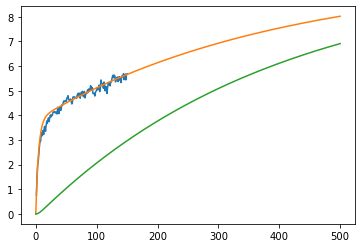

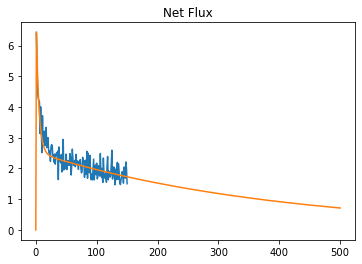

In [86]:
# Apply to 4xCO2 experiment
Tm = 0
Td = 0
T_mix = [Tm]
T_deep = [Td]
F_net = [0]
dt = 1  # Years
ny = 500 # 150
for y in range(ny):
    deep_ocean_flux = gamma*(Tm-Td)
    Tm = Tm + dt/C_mix * (F_4x + Lambda*Tm - epsilon*deep_ocean_flux)
    Td = Td + dt/C_deep * deep_ocean_flux
    T_mix.append(Tm)
    T_deep.append(Td)
    F_net.append(F_4x + Lambda*Tm  - (epsilon-1)*deep_ocean_flux)

fig, axes = plt.subplots()
plt.plot(np.arange(1,151), dt_4x.data)
plt.plot(np.arange(ny+1), T_mix)
plt.plot(np.arange(ny+1), T_deep)
fig, axes = plt.subplots()
plt.plot(np.arange(1,151), net_4x.data)
plt.plot(np.arange(ny+1), F_net)
axes.set_title('Net Flux')

Text(0.5, 1.0, 'Net Flux')

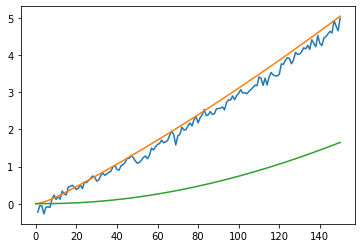

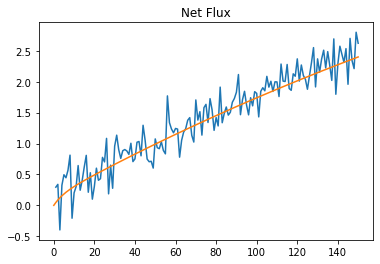

In [87]:
# Apply to 1pct experiment
Tm = 0
Td = 0
T_mix = [Tm]
T_deep = [Td]
F_net = [0]
dt = 1  # Years
ny = 150
for y in range(ny):
    deep_ocean_flux = gamma*(Tm-Td)
    F = F_4x * np.log(1.01**(y+1)) / np.log(4)
    Tm = Tm + dt/C_mix * (F + Lambda*Tm - epsilon*deep_ocean_flux)
    Td = Td + dt/C_deep * deep_ocean_flux
    T_mix.append(Tm)
    T_deep.append(Td)
    F_net.append(F + Lambda*Tm  - (epsilon-1)*deep_ocean_flux)


fig, axes = plt.subplots()
plt.plot(np.arange(1,151), dt_1pct.data)
plt.plot(np.arange(ny+1), T_mix)
plt.plot(np.arange(ny+1), T_deep)
fig, axes = plt.subplots()
plt.plot(np.arange(1,151), net_1pct.data)
plt.plot(np.arange(ny+1), F_net)
axes.set_title('Net Flux')

In [21]:
df = aera.get_base_df()

Use the following non-CO2 RF file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/nonco2_rf_ssp126_v1.dat
Use the following non-CO2 emission file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/nonco2_emis_ssp126_v3.dat
Use the following land use emission file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/lu_emis_ssp126_bern3d_adj_GCB2020_v1.dat
Use the following historical fossil fuel CO2 emission file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/co2_ff_GCP_plus_NDC_v1.dat
Use the following historical N2O concentration file: /home/599/mrd599/.local/lib/python3.9/site-packages/aera/data/n2o_conc_ssp126_v1.dat


In [41]:
# CO2 from ESM up to 2025
RUNID="AERA-ABS1p5-03"
expdir = f"/scratch/p66/mrd599/ACCESS-ESM1p5/exp/{RUNID}"

tas = xr.load_dataset(f'{expdir}/aera_data/aera_input_{RUNID}.nc').tas
co2 = xr.load_dataset(f'{expdir}/aera_data/aera_input_{RUNID}.nc').co2

C_CO2        = 1.5188
MODEL_CO2_PREINDUSTRIAL = 291.36*1e-6
co2_ratio = co2/(C_CO2*MODEL_CO2_PREINDUSTRIAL)
co2_forcing = F_4x * np.log(co2_ratio)/np.log(4)


In [125]:
print(7.04 / 6.97 * co2_forcing[165])
print(df['rf_non_co2'].loc[2014])

<xarray.DataArray 'co2' ()>
array(1.52436512)
Coordinates:
    time     datetime64[ns] 2015-07-02T12:00:00
0.3354


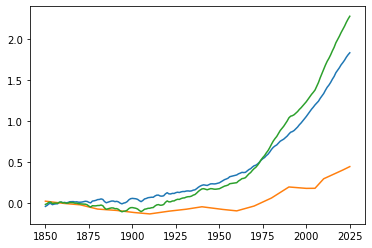

In [52]:
plt.plot(np.arange(1850,2026), co2_forcing[:176].data)
plt.plot(np.arange(1850,2026), df['rf_non_co2'].loc[1850:2025])
rf_tot = co2_forcing[:176].data + np.array(df['rf_non_co2'].loc[1850:2025])
plt.plot(np.arange(1850,2026), rf_tot)

In [104]:
tas_esm_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/tas_ACCESS-ESM1-5_esm-piControl.nc', use_cftime=True).tas[:,0,0]
rlut_esm_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rlut_ACCESS-ESM1-5_esm-piControl.nc', use_cftime=True).rlut[:,0,0]
rsdt_esm_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsdt_ACCESS-ESM1-5_esm-piControl.nc', use_cftime=True).rsdt[:,0,0]
rsut_esm_pi = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsut_ACCESS-ESM1-5_esm-piControl.nc', use_cftime=True).rsut[:,0,0]

tas_esm_hist = xr.open_dataset('/g/data/p66/mrd599/CMIP6/tas_ACCESS-ESM1-5_esm-hist.nc', use_cftime=True).tas[:,0,0]
rlut_esm_hist = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rlut_ACCESS-ESM1-5_esm-hist.nc', use_cftime=True).rlut[:,0,0]
rsdt_esm_hist = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsdt_ACCESS-ESM1-5_esm-hist.nc', use_cftime=True).rsdt[:,0,0]
rsut_esm_hist = xr.open_dataset('/g/data/p66/mrd599/CMIP6/rsut_ACCESS-ESM1-5_esm-hist.nc', use_cftime=True).rsut[:,0,0]

dt_esm_hist = tas_esm_hist - tas_esm_pi[:500].mean()
net_esm_pi = rsdt_esm_pi - rsut_esm_pi - rlut_esm_pi
net_esm_hist = rsdt_esm_hist - rsut_esm_hist - rlut_esm_hist - net_esm_pi.mean()

<AxesSubplot:xlabel='year'>

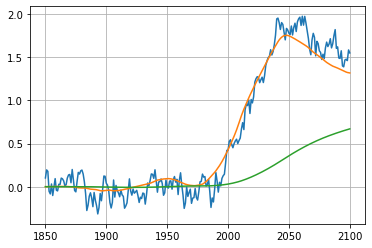

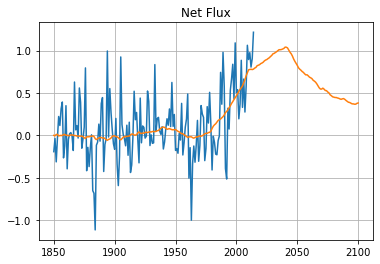

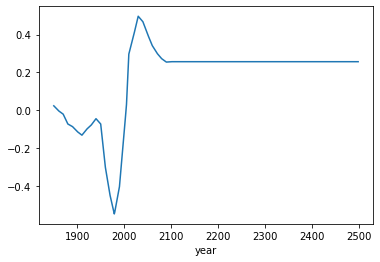

In [122]:
# Apply to historical experiment
Tm = 0
Td = 0
T_mix = [Tm]
T_deep = [Td]
F_net = [0]
dt = 1  # Years
lastyear = 2100
ny = lastyear - 1850 + 1
rf_mod = df['rf_non_co2'].copy()
# rf_mod.loc[1950:1969] -= np.linspace(0,0.5,20)
# rf_mod.loc[1970:1999] -= 0.5
# rf_mod.loc[2000:2010] -= np.linspace(0.5,0,11)
adjust = 0.6
rf_mod.loc[1950:1979] -= np.linspace(0,adjust,30)
rf_mod.loc[1980:1989] -= adjust
rf_mod.loc[1990:2010] -= np.linspace(adjust,0,21)
rf_tot = co2_forcing[:ny].data + np.array(rf_mod.loc[1850:lastyear])
for y in range(1,ny):
    deep_ocean_flux = gamma*(Tm-Td)
    Tm = Tm + dt/C_mix * (rf_tot[y] + Lambda*Tm - epsilon*deep_ocean_flux)
    Td = Td + dt/C_deep * deep_ocean_flux
    T_mix.append(Tm)
    T_deep.append(Td)
    F_net.append(rf_tot[y] + Lambda*Tm  - (epsilon-1)*deep_ocean_flux)


fig, axes = plt.subplots()
years = np.arange(1850,lastyear+1)
plt.plot(years, tas[:ny].data - tas[:50].data.mean())
plt.plot(years, T_mix)
plt.plot(years, T_deep)
axes.grid(True)
fig, axes = plt.subplots()
plt.plot(np.arange(1850,2015), net_esm_hist.data)
plt.plot(years, F_net)
axes.grid(True)
axes.set_title('Net Flux')
fig, axes = plt.subplots()
rf_mod.plot()


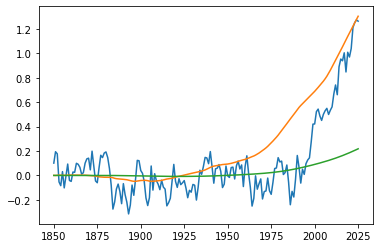

In [58]:
plt.plot(np.arange(1850,2026), tas[:176].data - tas[:50].data.mean())
plt.plot(np.arange(1850,2026), T_mix)
plt.plot(np.arange(1850,2026), T_deep)